# Telecom Churn - Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [184]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
import warnings
warnings.filterwarnings('ignore')

# show multiple outputs in jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from datetime import datetime

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

### Data Preparation

In [187]:
telecom_churn_data = pd.read_csv("telecom_churn_data.csv")
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [188]:
telecom_churn_data.shape

(99999, 226)

In [189]:
telecom_churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [190]:
telecom_churn_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

#### Filter High Value Customers

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 
As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: **Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

 

After filtering the high-value customers, you should get about 29.9k rows.



In [191]:
telecom_churn_data['total_rech_data_amt_6'] = telecom_churn_data['av_rech_amt_data_6'] * telecom_churn_data['total_rech_data_6']
telecom_churn_data['total_rech_data_amt_7'] = telecom_churn_data['av_rech_amt_data_7'] * telecom_churn_data['total_rech_data_7']

# drop columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8)
telecom_churn_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

# Avg recharge done = total amount spend would be the sum of total data recharge done & total call/sms recharges
telecom_av_rech_6n7 = (telecom_churn_data['total_rech_amt_6'].fillna(0) 
+ telecom_churn_data['total_rech_amt_7'].fillna(0) 
+ telecom_churn_data['total_rech_data_amt_6'].fillna(0) 
+ telecom_churn_data['total_rech_data_amt_7'].fillna(0))/2

# take 70 percentile of the calculated average amount
percentile_70_6n7 = np.percentile(telecom_av_rech_6n7, 70.0)
print("70 percentile is : ", percentile_70_6n7)

# fitler the given data set based on 70th percentile
telecom_hv_cust = telecom_churn_data[telecom_av_rech_6n7 >= percentile_70_6n7]

print("Dimensions of the filtered dataset:",telecom_hv_cust.shape)

70 percentile is :  478.0
Dimensions of the filtered dataset: (30001, 220)


#### Churn Metric

In [192]:
# lets introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn)
# we will calculate churn/non-churn based on the usage as mentioned in the problem statement
telecom_hv_cust['churn'] = np.where(telecom_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_hv_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,NaN,315,21.03,910.65,122.16,0.00,NaN,354.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,0


In [193]:
# churn vs non churn percentage
telecom_hv_cust['churn'].value_counts()/len(telecom_hv_cust)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

91% of the customers do not churn. This also points us to class imbalance.

In [194]:
cols = [c for c in telecom_hv_cust.columns if c[-2:] == '_9']
telecom_hv_cust.drop(axis=1, columns =cols, inplace=True)
cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [195]:
# lets check the columns with no variance in their values and drop such columns
for i in telecom_hv_cust.columns:
    if telecom_hv_cust[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", telecom_hv_cust[i].nunique(),"unique value")
        print("Dropping the column",i)
        telecom_hv_cust.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",telecom_hv_cust.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6

Column last_date_of_month_7 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_7

Column last_date_of_month_8 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_8

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_7

Co

In [196]:
# lets check the null values present in the dataset
(telecom_hv_cust.isnull().sum() * 100 / len(telecom_hv_cust)).sort_values(ascending = False)

arpu_3g_8                   46.825106
fb_user_8                   46.825106
date_of_last_rech_data_8    46.825106
count_rech_3g_8             46.825106
arpu_2g_8                   46.825106
                              ...    
last_day_rch_amt_6           0.000000
last_day_rch_amt_7           0.000000
last_day_rch_amt_8           0.000000
vol_2g_mb_6                  0.000000
mobile_number                0.000000
Length: 156, dtype: float64

In [197]:
# Drop Columns with > 30% of missing values except 9th Month's columns
cols = telecom_hv_cust.columns
telecom_null_perc = telecom_hv_cust.isnull().sum() * 100 / len(telecom_hv_cust)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
telecom_hv_cust.drop(drop_cols, axis=1,inplace = True)
telecom_hv_cust.shape

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6     

(30001, 130)

In [200]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = telecom_hv_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

# observation : all the columns below can be converted to date type

date_of_last_rech_6    6/27/2014
date_of_last_rech_7    7/25/2014
date_of_last_rech_8    8/26/2014
Name: 7, dtype: object


In [201]:
# convert to datetime
for col in object_col_data.columns:
    telecom_hv_cust[col] = pd.to_datetime(telecom_hv_cust[col])

In [202]:
telecom_hv_cust['date_of_last_rech_6'].isnull().sum()
telecom_hv_cust['date_of_last_rech_6'].dropna(inplace=True)

34

In [203]:
telecom_hv_cust["days_since_last_rech"] = telecom_hv_cust[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]].max(axis=1)
telecom_hv_cust['days_since_last_rech'] = datetime(2014, 9, 1) - telecom_hv_cust['days_since_last_rech']
telecom_hv_cust['days_since_last_rech'] = telecom_hv_cust['days_since_last_rech'].apply(lambda x: x.days)
telecom_hv_cust.loc[:,'date_of_last_rech_8':'days_since_last_rech']

,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,days_since_last_rech
7,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,802,57.74,19.38,18.74,0.00,1,6
8,2014-08-30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,...,0,0,0,315,21.03,910.65,122.16,0.00,0,2
21,2014-08-31,30,20,50,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,720,0.00,0.00,0.00,0.00,0,1
23,2014-08-24,0,179,0,0.00,0.48,0.01,0.00,599.09,1009.92,...,0,0,1,604,40.45,51.86,0.00,0.00,0,8
33,2014-08-26,252,0,455,87.05,57.76,7.97,3509.90,8154.65,7701.01,...,1,3,0,1328,358.10,2706.83,1714.67,0.00,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,2014-08-27,252,0,130,54.81,101.02,112.07,692.72,596.91,1012.70,...,0,0,0,473,1100.43,619.59,668.05,0.33,0,5
99984,2014-08-27,0,25,25,1248.50,725.05,202.22,0.00,0.00,0.00,...,0,0,0,820,0.00,0.00,0.00,0.00,0,5
99986,2014-08-18,550,786,0,34.28,16.41,6.47,736.01,1129.34,926.78,...,0,0,0,2696,497.45,598.67,604.08,0.00,0,14
99988,2014-08-29,50,50,50,0.00,0.00,0.79,0.00,13.56,678.74,...,0,0,0,328,104.73,0.00,0.00,0.00,0,3


In [204]:
cols = [c for c in telecom_hv_cust.columns if "date_of_last_rech" in c]
telecom_hv_cust.drop(axis=1, columns =cols, inplace=True)
cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

### EDA

In [205]:
corr = telecom_hv_cust.corr()
corr

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,days_since_last_rech
mobile_number,1.000000,0.034202,0.026099,0.030370,0.009544,0.003339,0.004967,0.018223,0.007464,0.015061,...,-0.015299,-0.014752,-0.010671,0.315629,-0.031658,-0.027751,-0.035041,-0.009081,-0.018506,0.024129
arpu_6,0.034202,1.000000,0.715490,0.663772,0.342709,0.227770,0.199998,0.514582,0.356831,0.306667,...,-0.000907,-0.023352,-0.015617,0.037776,0.066643,0.063641,0.113506,0.048920,0.052528,-0.073831
arpu_7,0.026099,0.715490,1.000000,0.768778,0.216465,0.315769,0.266916,0.363329,0.487917,0.395600,...,-0.025477,0.009179,-0.000962,0.021589,0.081473,0.101855,0.060853,0.059375,0.027747,-0.106984
arpu_8,0.030370,0.663772,0.768778,1.000000,0.159882,0.229720,0.339127,0.295660,0.376715,0.516878,...,-0.020082,-0.002972,0.042563,0.056088,0.139081,0.084268,0.079767,0.104693,-0.095391,-0.181313
onnet_mou_6,0.009544,0.342709,0.216465,0.159882,1.000000,0.767866,0.643175,0.082255,0.034085,0.035279,...,-0.053035,-0.046470,-0.045749,-0.050715,-0.107520,-0.111874,-0.102695,-0.034734,0.085695,-0.074662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jul_vbc_3g,-0.027751,0.063641,0.101855,0.084268,-0.111874,-0.111431,-0.093217,-0.102034,-0.104339,-0.077542,...,0.069026,0.065015,0.049832,0.024279,0.704969,1.000000,0.678782,0.151339,-0.048190,0.051234
jun_vbc_3g,-0.035041,0.113506,0.060853,0.079767,-0.102695,-0.109149,-0.086237,-0.086537,-0.098608,-0.072938,...,0.065434,0.052727,0.047330,0.019870,0.594113,0.678782,1.000000,0.141659,-0.043436,0.051396
sep_vbc_3g,-0.009081,0.048920,0.059375,0.104693,-0.034734,-0.034977,-0.029178,-0.019638,-0.021823,-0.011159,...,0.062107,0.049728,0.052796,0.010567,0.195207,0.151339,0.141659,1.000000,-0.035907,-0.020639
churn,-0.018506,0.052528,0.027747,-0.095391,0.085695,0.052540,-0.040711,0.065406,0.042612,-0.072600,...,0.002286,-0.000127,-0.026617,-0.087654,-0.070773,-0.048190,-0.043436,-0.035907,1.000000,0.144623


<Figure size 1440x720 with 0 Axes>

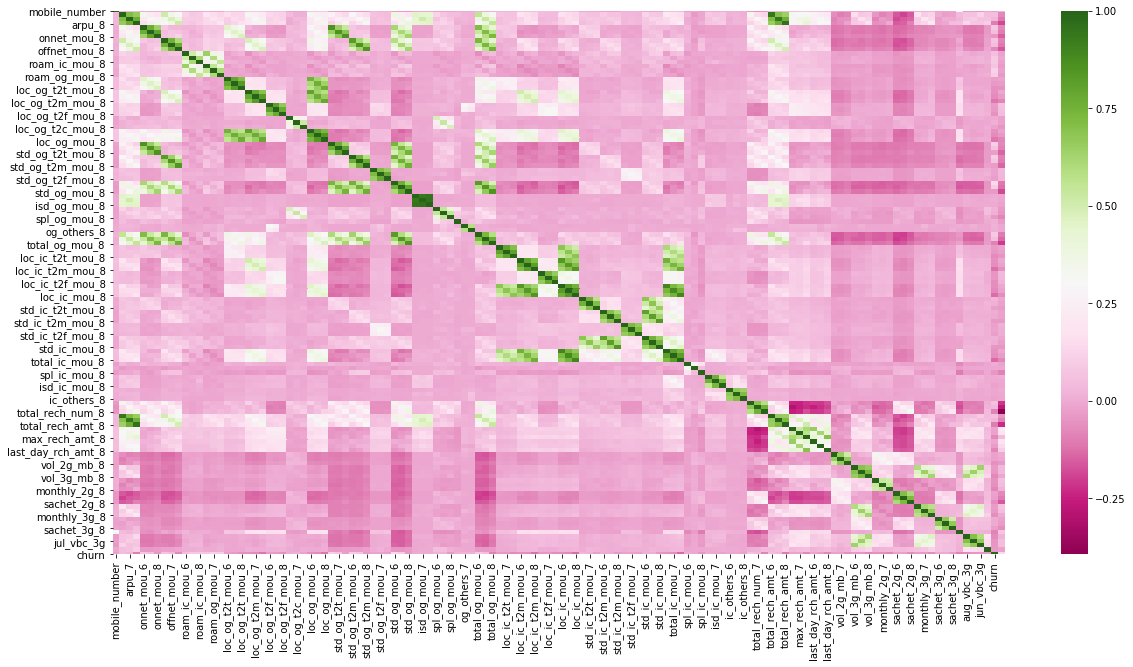

In [206]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(corr, cmap="PiYG")

We will remove highly correlated features for two reasons - 

- PCA needs non-correlated features to perform well
- Decision Trees are immune to multicollinearity anyways.

## TODO - lets check the correlation amongst the features, drop the highly correlated ones

We need to find a way to get correlation value list of more than 0.70 and less than 0.70 and drop them.

In [207]:
telecom_hv_cust.shape

(28592, 128)

## To Do -  

- We have to do PCA and Xgboost
- We have to check if data is imbalanced, we would then need to do oversampling to balance it

In [214]:
telecom_hv_cust.isnull().sum().sort_values(ascending = False)

days_since_last_rech    0
churn                   0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
                       ..
ic_others_8             0
total_rech_num_6        0
total_rech_num_7        0
total_rech_num_8        0
mobile_number           0
Length: 128, dtype: int64

In [213]:
telecom_hv_cust = telecom_hv_cust[~np.isnan(telecom_hv_cust['loc_ic_t2f_mou_8'])]
telecom_hv_cust = telecom_hv_cust[~np.isnan(telecom_hv_cust['loc_ic_mou_6'])]
telecom_hv_cust = telecom_hv_cust[~np.isnan(telecom_hv_cust['loc_ic_t2m_mou_7'])]

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [215]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_hv_cust.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_hv_cust['churn']

y.head()

7     1
8     0
21    0
23    0
33    0
Name: churn, dtype: int32

In [217]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [218]:
import statsmodels.api as sm

In [219]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19825
Model Family:                Binomial   Df Model:                          126
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3003.7
Date:                Fri, 30 Oct 2020   Deviance:                       6007.4
Time:                        00:18:26   Pearson chi2:                 2.15e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.8798      0.140    -13.458      0.000      -2.154      -1.606
arpu_6                   0.0002      0.000      0.586      0.558      -0.000       0.001
arpu_7                   0.0010      0.000      2.902      0.004       0.000       0.002
arpu_8                   0.0005      0.000      1.169      0.242      -0.000       0.001
onnet_mou_6              0.0041      0.009      0.437      0.662      -0.014       0.023
onnet_mou_7              0.0057      0.005      1.063      0.288      -0.005       0.016
onnet_mou_8             -0.0063      0.008     -0.817      0.414      -0.021       0.009
offnet_mou_6             0.0046      0.009      0.493      0.622      -0.014       0.023
offnet_mou_7             0.0051      0.005      0.977      0.329      -0.005       0.015
offnet_mou_8            -0.0061      0.008     -0.796      0.426      -0.021       0.009
roam_ic_mou_6            0.0007      0.000      1.466      0.143      -0.000       0.002
roam_ic_mou_7            0.0003      0.001      0.497      0.619      -0.001       0.001
roam_ic_mou_8            0.0001      0.000      0.267      0.789      -0.001       0.001
roam_og_mou_6           -0.0040      0.009     -0.422      0.673      -0.022       0.014
roam_og_mou_7           -0.0045      0.005     -0.841      0.400      -0.015       0.006
roam_og_mou_8            0.0066      0.008      0.865      0.387      -0.008       0.022
loc_og_t2t_mou_6         0.8940      6.441      0.139      0.890     -11.730      13.518
loc_og_t2t_mou_7         5.3946      6.481      0.832      0.405      -7.307      18.096
loc_og_t2t_mou_8        17.4506      7.064      2.470      0.013       3.606      31.295
loc_og_t2m_mou_6         0.8924      6.441      0.139      0.890     -11.731      13.516
loc_og_t2m_mou_7         5.3951      6.481      0.833      0.405      -7.307      18.097
loc_og_t2m_mou_8        17.4507      7.064      2.470      0.013       3.606      31.296
loc_og_t2f_mou_6         0.8987      6.441      0.140      0.889     -11.726      13.523
loc_og_t2f_mou_7         5.3826      6.481      0.831      0.406      -7.320      18.085
loc_og_t2f_mou_8        17.4557      7.064      2.471      0.013       3.610      31.301
loc_og_t2c_mou_6        -0.0189      0.008     -2.399      0.016      -0.034      -0.003
loc_og_t2c_mou_7        -0.0012      0.006     -0.200      0.842      -0.012       0.010
loc_og_t2c_mou_8         0.0067      0.007      0.897      0.370      -0.008       0.021
loc_og_mou_6           -16.7017      7.931     -2.106      0.035     -32.247      -1.157
loc_og_mou_7           -10.7141      8.438     -1.270      0.204     -27.252       5.823
loc_og_mou_8            -8.4103      9.299     -0.904      0.366     -26.636       9.815
std_og_t2t_mou_6        -3.9024      7.774     -0.502    

### Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

In [ ]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

In [ ]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

In [ ]:
X_test[col].shape
#res = modres.predict(X_test[col])

### Making Predictions

In [ ]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

### Model Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

In [ ]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [ ]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [ ]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

#### We see an overall AUC score of 0.83 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- Can PCA help reduce our effort?

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [ ]:
X_train.shape

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

#### Components from the PCA

In [ ]:
pca.components_

Looking at the explained variance ratio for each component

In [ ]:
pca.explained_variance_ratio_

Making a scree plot for the explained variance

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 16 components

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
pca_final = IncrementalPCA(n_components=16)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

Plotting the heatmap of the corr matrix

In [ ]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

### Applying logistic regression on the data on our Principal components

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

#### Making it a little more unsupervised 

In [ ]:
pca_again = PCA(0.9)

In [ ]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [ ]:
df_train_pca2.shape

Following it up with a logistic regression model

In [ ]:
learner_pca2 = LogisticRegression()

In [ ]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [ ]:
df_test_pca2 = pca_again.transform(X_test)

In [ ]:
df_test_pca2.shape

In [ ]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

PCA is great!